In [1]:
from keras.layers import Input,Dense,Convolution2D,Activation,MaxPooling2D,Flatten,merge
from keras.layers.merge import add
from keras.models import Model, load_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.layers.convolutional import Deconv2D as Conv2DTranspose


/home/savath/.virtualenvs/wazir/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


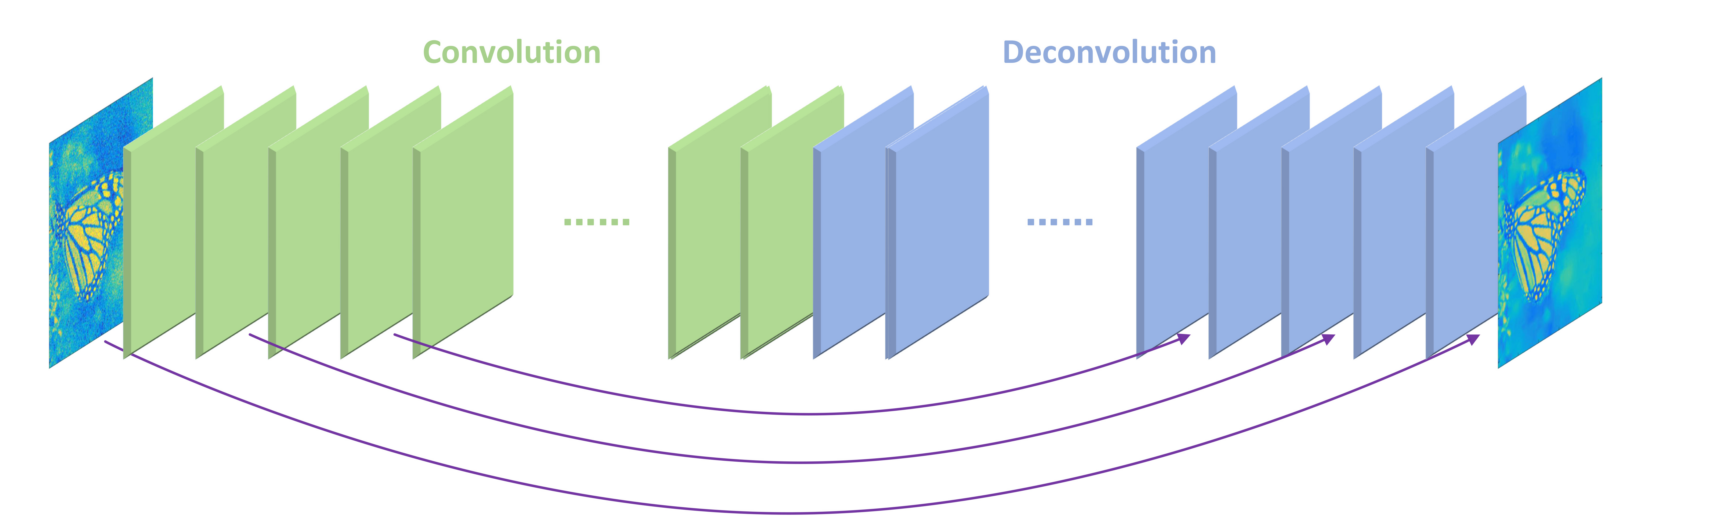

In [2]:
from IPython.display import Image
Image('DECONVOLUTION.png')

In [3]:
input_img = Input(shape=(None,None,3))
############################
####### CONVOLUTIONS #######
############################

c1 = Convolution2D(64, (3, 3))(input_img)
a1 = Activation('relu')(c1)

c2 = Convolution2D(64, (3, 3))(a1)
a2 = Activation('relu')(c2)

c3 = Convolution2D(64, (3, 3))(a2)
a3 = Activation('relu')(c3)

c4 = Convolution2D(64, (3, 3))(a3)
a4 = Activation('relu')(c4)

c5 = Convolution2D(64, (3, 3))(a4)
a5 = Activation('relu')(c5)

############################
###### DECONVOLUTIONS ######
############################

d1 = Conv2DTranspose(64, (3, 3))(a5)
a6 = Activation('relu')(d1)

m1 = add([a4, a6])
a7 = Activation('relu')(m1)

d2 = Conv2DTranspose(64, (3, 3))(a7)
a8 = Activation('relu')(d2)

m2 = add([a3, a8])
a9 = Activation('relu')(m2)

d3 = Conv2DTranspose(64, (3, 3))(a9)
a10 = Activation('relu')(d3)

m3 = add([a2, a10])
a11 = Activation('relu')(m3)

d4 = Conv2DTranspose(64, (3, 3))(a11)
a12 = Activation('relu')(d4) 

m4 = add([a1, a12])
a13 = Activation('relu')(m4)

d5 = Conv2DTranspose(3, (3, 3))(a13)
a14 = Activation('relu')(d5)

m5 = add([input_img, a14]) # Everything goes well without this line
out = Activation('relu')(m5)

model = Model(input_img, out) 
model.compile(optimizer='adam', loss='mse')

In [4]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 6 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, None, None, 6 36928       activation_1[0][0]               
__________________________________________________________________________________________________
activation

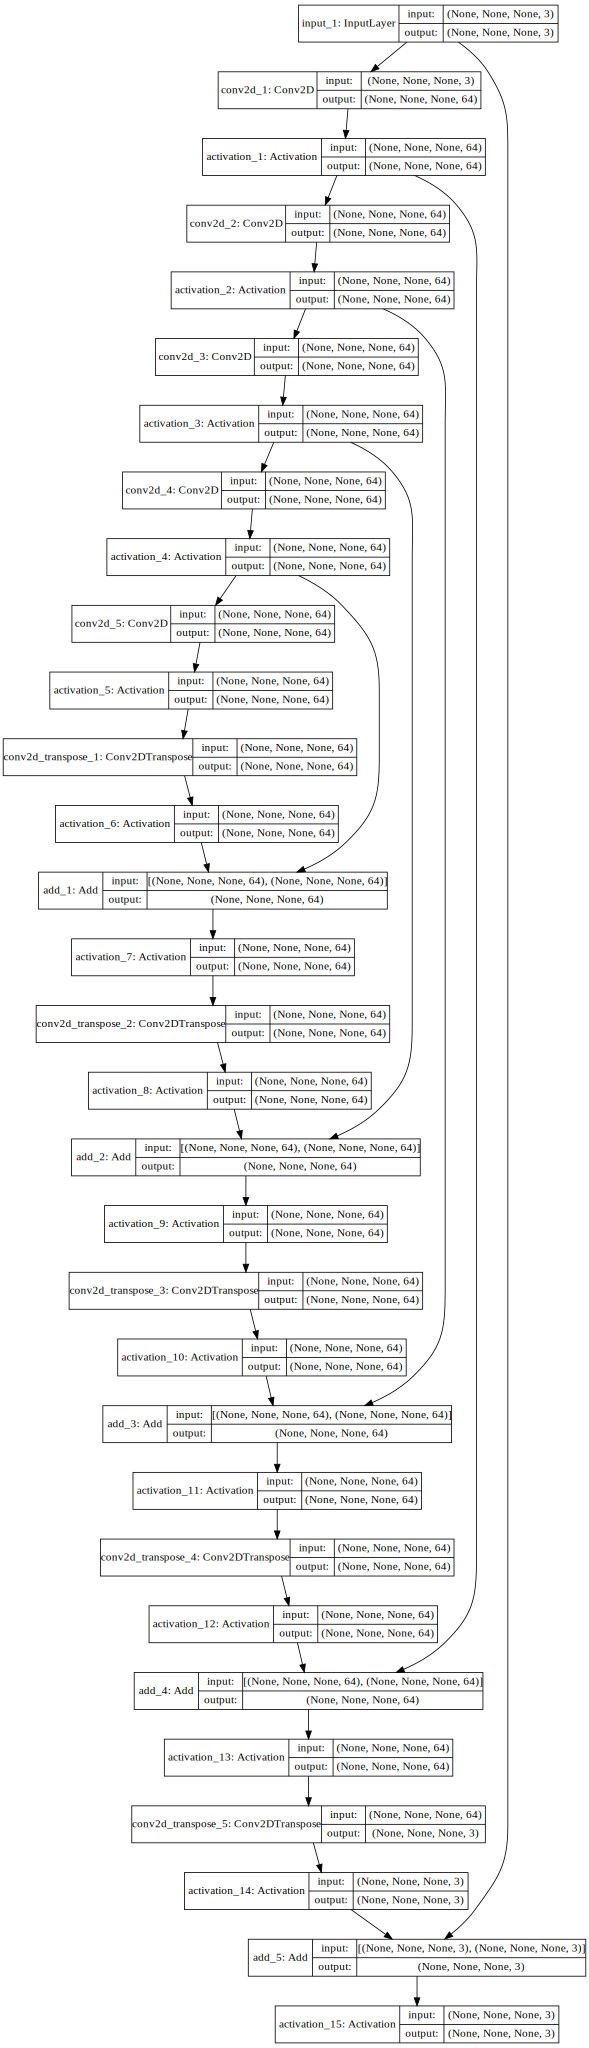

In [5]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [6]:
plot_model(model, to_file='FSRCNN USES 8 LAYERS.png')